<a href="https://colab.research.google.com/github/SBGuillermo/TFM-AnalisisComercio/blob/main/Notebooks/4_Analisis_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis RFM

In [55]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [2]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv

--2021-07-06 16:12:13--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17889332 (17M) [text/plain]
Saving to: ‘Table1.csv’

Table1.csv          100%[===================>]  17.06M  27.8MB/s    in 0.6s    

2021-07-06 16:12:14 (27.8 MB/s) - ‘Table1.csv’ saved [17889332/17889332]



In [3]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv

--2021-07-06 16:12:14--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17784301 (17M) [text/plain]
Saving to: ‘Table2.csv’

Table2.csv          100%[===================>]  16.96M  79.3MB/s    in 0.2s    

2021-07-06 16:12:14 (79.3 MB/s) - ‘Table2.csv’ saved [17784301/17784301]



In [4]:
df1 = pd.read_csv('/content/Table1.csv')
df1

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,285947,561967,22400,other,3,2011-08-01 13:11:00,0.39,12844.0,United Kingdom,1.17
199996,199996,285948,561967,82482,WOODEN PICTURE FRAME WHITE FINISH,5,2011-08-01 13:11:00,2.55,12844.0,United Kingdom,12.75
199997,199997,285949,561967,82551,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
199998,199998,285950,561967,82552,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35


In [5]:
df2 = pd.read_csv('/content/Table2.csv')
df2

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,200000,285952,561967,23306,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
1,200001,285953,561967,47504H,other,1,2011-08-01 13:11:00,0.79,12844.0,United Kingdom,0.79
2,200002,285954,561967,21907,other,6,2011-08-01 13:11:00,2.10,12844.0,United Kingdom,12.60
3,200003,285955,561967,21992,other,3,2011-08-01 13:11:00,1.25,12844.0,United Kingdom,3.75
4,200004,285956,561967,21754,other,2,2011-08-01 13:11:00,5.95,12844.0,United Kingdom,11.90
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [6]:
df = pd.concat([df1,df2], axis=0)
df

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [7]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1', 'Description', 'Quantity', 'UnitPrice', 'Country', 'StockCode'], axis=1)

In [8]:
df

,InvoiceNo,InvoiceDate,CustomerID,PrecioTotal
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...,...
197919,581587,2011-12-09 12:50:00,12680.0,10.20
197920,581587,2011-12-09 12:50:00,12680.0,12.60
197921,581587,2011-12-09 12:50:00,12680.0,16.60
197922,581587,2011-12-09 12:50:00,12680.0,16.60


In [9]:
transaction = df.groupby(['InvoiceNo','CustomerID', 'InvoiceDate'], as_index=False).sum()
transaction

,InvoiceNo,CustomerID,InvoiceDate,PrecioTotal
0,536365,17850.0,2010-12-01 08:26:00,139.12
1,536366,17850.0,2010-12-01 08:28:00,22.20
2,536367,13047.0,2010-12-01 08:34:00,278.73
3,536368,13047.0,2010-12-01 08:34:00,70.05
4,536369,13047.0,2010-12-01 08:35:00,17.85
...,...,...,...,...
18561,581583,13777.0,2011-12-09 12:23:00,124.60
18562,581584,13777.0,2011-12-09 12:25:00,140.64
18563,581585,15804.0,2011-12-09 12:31:00,329.05
18564,581586,13113.0,2011-12-09 12:49:00,339.20


In [10]:
transaction['InvoiceDate'].max()

'2011-12-09 12:50:00'

In [11]:
transaction['InvoiceDate'] = pd.to_datetime(transaction['InvoiceDate'])
transaction["day"] = transaction["InvoiceDate"].dt.date
transaction

,InvoiceNo,CustomerID,InvoiceDate,PrecioTotal,day
0,536365,17850.0,2010-12-01 08:26:00,139.12,2010-12-01
1,536366,17850.0,2010-12-01 08:28:00,22.20,2010-12-01
2,536367,13047.0,2010-12-01 08:34:00,278.73,2010-12-01
3,536368,13047.0,2010-12-01 08:34:00,70.05,2010-12-01
4,536369,13047.0,2010-12-01 08:35:00,17.85,2010-12-01
...,...,...,...,...,...
18561,581583,13777.0,2011-12-09 12:23:00,124.60,2011-12-09
18562,581584,13777.0,2011-12-09 12:25:00,140.64,2011-12-09
18563,581585,15804.0,2011-12-09 12:31:00,329.05,2011-12-09
18564,581586,13113.0,2011-12-09 12:49:00,339.20,2011-12-09


In [12]:
transaction = transaction.drop(['InvoiceDate'], axis=1)
transaction

,InvoiceNo,CustomerID,PrecioTotal,day
0,536365,17850.0,139.12,2010-12-01
1,536366,17850.0,22.20,2010-12-01
2,536367,13047.0,278.73,2010-12-01
3,536368,13047.0,70.05,2010-12-01
4,536369,13047.0,17.85,2010-12-01
...,...,...,...,...
18561,581583,13777.0,124.60,2011-12-09
18562,581584,13777.0,140.64,2011-12-09
18563,581585,15804.0,329.05,2011-12-09
18564,581586,13113.0,339.20,2011-12-09


In [13]:
last_day = dt.date(2011,12,10)

In [14]:
total_money_value= transaction.groupby(['CustomerID'], as_index=False).sum()
total_money_value = total_money_value.drop(['InvoiceNo'], axis=1)
total_money_value

,CustomerID,PrecioTotal
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [15]:
normalice = transaction.groupby(['day', 'CustomerID'], as_index=False).count()
normalice = normalice.drop(['InvoiceNo','PrecioTotal'], axis=1)
normalice

,day,CustomerID
0,2010-12-01,12431.0
1,2010-12-01,12433.0
2,2010-12-01,12583.0
3,2010-12-01,12662.0
4,2010-12-01,12748.0
...,...,...
16761,2011-12-09,17428.0
16762,2011-12-09,17490.0
16763,2011-12-09,17581.0
16764,2011-12-09,17754.0


In [16]:
normalice['seniority'] = ''
normalice

,day,CustomerID,seniority
0,2010-12-01,12431.0,
1,2010-12-01,12433.0,
2,2010-12-01,12583.0,
3,2010-12-01,12662.0,
4,2010-12-01,12748.0,
...,...,...,...
16761,2011-12-09,17428.0,
16762,2011-12-09,17490.0,
16763,2011-12-09,17581.0,
16764,2011-12-09,17754.0,


In [17]:
for x in range (0, len(normalice)):
  normalice.iloc[x,2] = (last_day - normalice.iloc[x,0]).days

In [18]:
normalice

,day,CustomerID,seniority
0,2010-12-01,12431.0,374
1,2010-12-01,12433.0,374
2,2010-12-01,12583.0,374
3,2010-12-01,12662.0,374
4,2010-12-01,12748.0,374
...,...,...,...
16761,2011-12-09,17428.0,1
16762,2011-12-09,17490.0,1
16763,2011-12-09,17581.0,1
16764,2011-12-09,17754.0,1


In [19]:
type(normalice.iloc[0,2])

int

In [20]:
normalice = normalice.drop(['day'], axis=1)

In [21]:
normalice_final= normalice.groupby(['CustomerID'], as_index=False).max()
normalice_final

,CustomerID,seniority
0,12346.0,326
1,12347.0,368
2,12348.0,359
3,12349.0,19
4,12350.0,311
...,...,...
4334,18280.0,278
4335,18281.0,181
4336,18282.0,127
4337,18283.0,338


In [22]:
frecuenly = transaction.groupby(['CustomerID'], as_index=False).count()
frecuenly = frecuenly.drop(['PrecioTotal', 'day'], axis=1)
frecuenly = frecuenly.rename(columns={'InvoiceNo':'frecuency'})
frecuenly

,CustomerID,frecuency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4334,18280.0,1
4335,18281.0,1
4336,18282.0,2
4337,18283.0,16


In [23]:
recenly = transaction.groupby(['CustomerID'], as_index=False)['day'].max()
recenly

,CustomerID,day
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4334,18280.0,2011-03-07
4335,18281.0,2011-06-12
4336,18282.0,2011-12-02
4337,18283.0,2011-12-06


In [24]:
type(recenly.iloc[0,1])

datetime.date

In [25]:
recenly['NofDay'] = ''
for x in range (0, len(recenly)):
  recenly.iloc[x,2] = (last_day - recenly.iloc[x,1]).days

In [26]:
recenly

,CustomerID,day,NofDay
0,12346.0,2011-01-18,326
1,12347.0,2011-12-07,3
2,12348.0,2011-09-25,76
3,12349.0,2011-11-21,19
4,12350.0,2011-02-02,311
...,...,...,...
4334,18280.0,2011-03-07,278
4335,18281.0,2011-06-12,181
4336,18282.0,2011-12-02,8
4337,18283.0,2011-12-06,4


In [27]:
recenly = recenly.drop(['day'], axis= 1)

In [28]:
partial_table = pd.merge(total_money_value, frecuenly, on='CustomerID')
partial_table = pd.merge(partial_table, recenly, on='CustomerID')
partial_table = pd.merge(partial_table, normalice_final, on='CustomerID')
partial_table

,CustomerID,PrecioTotal,frecuency,NofDay,seniority
0,12346.0,77183.60,1,326,326
1,12347.0,4310.00,7,3,368
2,12348.0,1797.24,4,76,359
3,12349.0,1757.55,1,19,19
4,12350.0,334.40,1,311,311
...,...,...,...,...,...
4334,18280.0,180.60,1,278,278
4335,18281.0,80.82,1,181,181
4336,18282.0,178.05,2,8,127
4337,18283.0,2094.88,16,4,338


In [29]:
final_table=pd.DataFrame()

In [30]:
final_table['CustomerID'] = partial_table['CustomerID']
final_table['PrecioDia'] = (partial_table['PrecioTotal'] / partial_table['seniority']).astype('int')
final_table['FrecuencyRel'] = (partial_table['frecuency'] / partial_table['seniority'])
final_table['NofDay'] = partial_table['NofDay']
final_table

,CustomerID,PrecioDia,FrecuencyRel,NofDay
0,12346.0,236,0.003067,326
1,12347.0,11,0.019022,3
2,12348.0,5,0.011142,76
3,12349.0,92,0.052632,19
4,12350.0,1,0.003215,311
...,...,...,...,...
4334,18280.0,0,0.003597,278
4335,18281.0,0,0.005525,181
4336,18282.0,1,0.015748,8
4337,18283.0,6,0.047337,4


In [31]:
final_table['NofDayScore'] = pd.qcut(final_table['NofDay'],4,[1,2,3,4])
final_table['FrecuencyRelScore'] = pd.qcut(final_table['FrecuencyRel'],4,[4,3,2,1])
final_table['PrecioDiaScore'] = pd.qcut(final_table['PrecioDia'],4,[4,3,2,1])
final_table


,CustomerID,PrecioDia,FrecuencyRel,NofDay,NofDayScore,FrecuencyRelScore,PrecioDiaScore
0,12346.0,236,0.003067,326,4,4,1
1,12347.0,11,0.019022,3,1,2,1
2,12348.0,5,0.011142,76,3,3,2
3,12349.0,92,0.052632,19,2,1,1
4,12350.0,1,0.003215,311,4,4,4
...,...,...,...,...,...,...,...
4334,18280.0,0,0.003597,278,4,4,4
4335,18281.0,0,0.005525,181,4,4,4
4336,18282.0,1,0.015748,8,1,2,4
4337,18283.0,6,0.047337,4,1,1,2


## Clasificación de los cliente

En este caso tenemos dos opciones para hacerlo:

- Damos mayor prioridad a una variable que a otra. Por ejemplo, nos importa más el dinero gastado por un cliente que cuando fue la última vez que compró.

- O clasificamos a los clientes atendiendo a todas las características usando algún sistema de Unsupervised Machine Learning

In [32]:
final_table_RFM = pd.DataFrame()
final_table_RFM['CustomerID'] = final_table['CustomerID']
final_table_RFM['PrecioDia'] = final_table['PrecioDia']
final_table_RFM['FrecuencyRel'] = final_table['FrecuencyRel']
final_table_RFM['NofDay'] = final_table['NofDay']
final_table_RFM['RFM']= final_table["NofDayScore"].astype(str) + final_table["FrecuencyRelScore"].astype(str) + final_table["PrecioDiaScore"].astype(str)
final_table_RFM['RFMScore']= final_table["NofDayScore"].astype(int) + final_table["FrecuencyRelScore"].astype(int) + final_table["PrecioDiaScore"].astype(int)
final_table_RFM

,CustomerID,PrecioDia,FrecuencyRel,NofDay,RFM,RFMScore
0,12346.0,236,0.003067,326,441,9
1,12347.0,11,0.019022,3,121,4
2,12348.0,5,0.011142,76,332,8
3,12349.0,92,0.052632,19,211,4
4,12350.0,1,0.003215,311,444,12
...,...,...,...,...,...,...
4334,18280.0,0,0.003597,278,444,12
4335,18281.0,0,0.005525,181,444,12
4336,18282.0,1,0.015748,8,124,7
4337,18283.0,6,0.047337,4,112,4


In [33]:
final_table_RFM.sort_values('RFM', ascending=True)

,CustomerID,PrecioDia,FrecuencyRel,NofDay,RFM,RFMScore
815,13435.0,20,0.036842,6,111,3
391,12841.0,10,0.067204,5,111,3
933,13596.0,53,0.153846,6,111,3
389,12839.0,15,0.038043,3,111,3
935,13599.0,14,0.057221,2,111,3
...,...,...,...,...,...,...
1439,14304.0,1,0.004484,223,444,12
3792,17535.0,0,0.003559,281,444,12
3793,17536.0,0,0.005618,178,444,12
572,13101.0,0,0.004255,235,444,12


In [34]:
RMF_table = final_table_RFM.groupby('RFM', as_index=False)['CustomerID'].count()
RMF_table 

,RFM,CustomerID
0,111,501
1,112,130
2,113,15
3,114,3
4,121,64
5,122,111
6,123,96
7,124,6
8,131,13
9,132,27


In [35]:
RMFScore_table = final_table_RFM.groupby('RFMScore', as_index=False)['CustomerID'].count()
RMFScore_table

,RFMScore,CustomerID
0,3,501
1,4,408
2,5,370
3,6,444
4,7,465
5,8,427
6,9,430
7,10,300
8,11,281
9,12,713


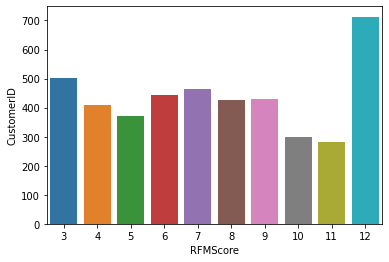

In [71]:
sns.barplot(data=RMFScore_table, x=RMFScore_table.RFMScore, y=RMFScore_table.CustomerID)


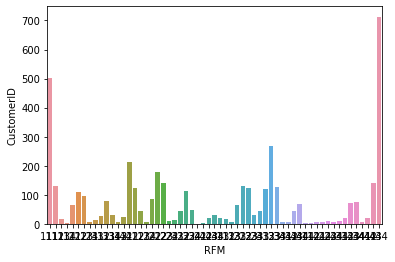

In [70]:
sns.barplot(data=RMF_table, x=RMF_table.RFM, y=RMF_table.CustomerID)